# 100_Analysis_Golden_Year

## Purpose

In this notebook we will begin the analyses of our first research question which is "What was the golden year for the industry in terms of release numbers and overall sales, both globally and in the separate regions". 
- Analyse the number of games released per year 
- Analyse number of genres per year 
- Highest sold game in each genre
- Numeric scores 
- Score phrase
- Avg rating per year 


### Datasets 

- Input : Clean_Combined.pkl && Clean_Game_Sales_Total.pkl
- Output : 100_Golden_Year.pkl

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Matplot lib configuation for the drawings of our graphs that we are going to use
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
# Check the path exists for the two datasets we need, if not print an error message 
if not os.path.exists("../../data/prep/Clean_Combined.pkl"):
    print("Missing Dataset File")


In [4]:
# Check the path exists for the datasets we need otherwise an error message is produced
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Analysis 

### Golden Year Industry 

We want to analyse the golden year in the indusry section. What we mean by this is we want to analyse what was the best year for developers. Which years had the highest ratings , and the number of games that were sold by each develope globally and also in each separate region. We will also analyse the golden years in terms of the gamers perspective. We will analyse the number of games released for the gamer to be able to play on. 

In [5]:
# store the combined dataset in combined_data , check it loads correctly by using .shape
combined_data = pd.read_pickle("../../data/prep/Clean_Combined.pkl")
combined_data.shape

(6434, 12)

In [6]:
# Store the clean game sales total in sales, check if it is loaded in correctly using .shape to get the number of columns and rows. 
sales = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
sales.shape

(16444, 11)

Now that all of the data is loaded in we can begin the first part of the analyses of this research question. We will begin the analysing of higest ratings and the year from the combined_data as this is our original IGN and all time game sales combined together containing the ratings for each game. 

In [7]:
# Group the year of release with name and look for non unique values. This shows the number of games released per year
videogame_by_year = sales.groupby('Year_of_Release')['Name'].nunique()
videogame_by_year

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      40
1992.0      41
1993.0      59
1994.0     117
1995.0     215
1996.0     258
1997.0     282
1998.0     364
1999.0     326
2000.0     325
2001.0     428
2002.0     631
2003.0     546
2004.0     550
2005.0     657
2006.0     773
2007.0     884
2008.0    1039
2009.0    1001
2010.0     900
2011.0     779
2012.0     446
2013.0     335
2014.0     319
2015.0     362
2016.0     297
Name: Name, dtype: int64

In [8]:
# Find the maximum value of the video_game_by_year, 2008 is the highest 
videogame_by_year.argmax()

2008.0

Text(0,0.5,'Number of Releases')

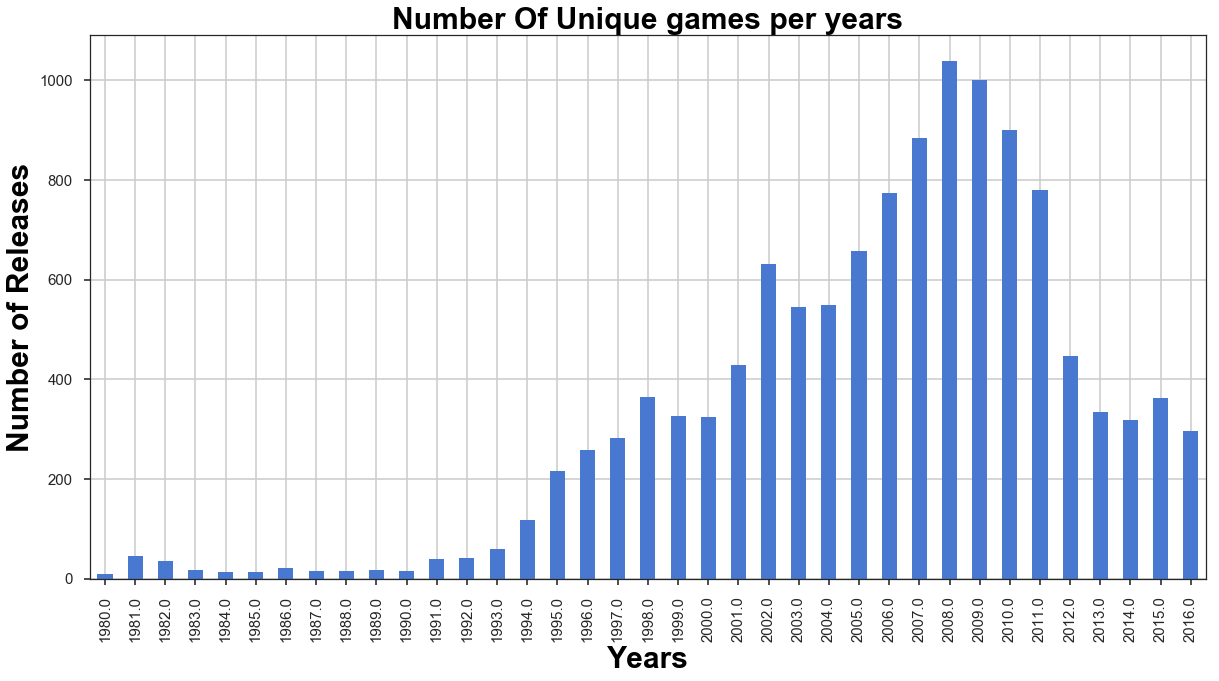

In [9]:
# Plotting the unique games per year on a bar chart 
ax = videogame_by_year.plot(kind='bar', title="Unique games per year", figsize=(20,10))
ax.set_title('Number Of Unique games per years', size=30)
# size set to 30 for consistency
ax.set_xlabel("Years", size=30)
ax.set_ylabel("Number of Releases",size=30)

As seen from the graph above the highest year for video game release was in 2008 followed by 2009. So the Best year to release a video game globally was 2008. Is this always the case ? We will also analyse the separate regions to see if this trend maintains across each region. 

### Highest Genre Category

Lets check to see what the highest genre category overall is. This will help us see which genre releases the most amount of games. As seen below the action Genre is the highest releasing category. 

In [10]:
# genre_by_year = sales.groupby(['Genre', 'Year_of_Release'])['Year_of_Release'].count()
# genre_by_year

# grouping the amount of genres released across the 30 years and counting them
genre_by_year = sales.groupby(['Genre'])['Year_of_Release'].count()
genre_by_year

Genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: Year_of_Release, dtype: int64

As we can see above is the count for all the genre categories that got released. The highest released genre categories are Action, Misc, Adventure , Role-Playing, Sports, Shooter. These are the genre categories with the highest releases. 

### Sales 

I would like to analyse the sales now for each region and also for the global overall sales. Lets begin the analyses of global sales first. First lets analyse the number of sales of each genre globally. I will filter the value of the sales to be over 25.00 million so that the list is shorter and shows the top games only. This will give me the highest sales for the global sales. 

In [11]:
# sales_by_year = sales.groupby(['Global_Sales', 'Genre'])['Genre'].agg(['count'])
# total = sales_by_year.groupby('Global_Sales').size()
# total

# Only list sales for the Global sales that are higher than 25 million to filter the top games sold globally. 
sales22 =  sales[sales['Global_Sales'] >= 25.00]
sales22

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN


We will now group the new dataframe which filters the sales of over 25 million. We will use a groupby function to groupby the name and the global sales so we can see which game performed best globally. Wii sports and Super Mario Bros performed best globally. We will compare this to see if this is the case across all regions

In [12]:
# Find the names of the games that had a higher sales sum greater than 25 million. 
test = sales22.groupby(['Name'])['Global_Sales'].sum()
test

Name
Duck Hunt                    28.31
Mario Kart Wii               35.52
New Super Mario Bros.        29.80
New Super Mario Bros. Wii    28.32
Pokemon Red/Pokemon Blue     31.37
Super Mario Bros.            40.24
Tetris                       30.26
Wii Play                     28.92
Wii Sports                   82.53
Wii Sports Resort            32.77
Name: Global_Sales, dtype: float64

Text(0.5,1,'Highest Global Sale Game Names')

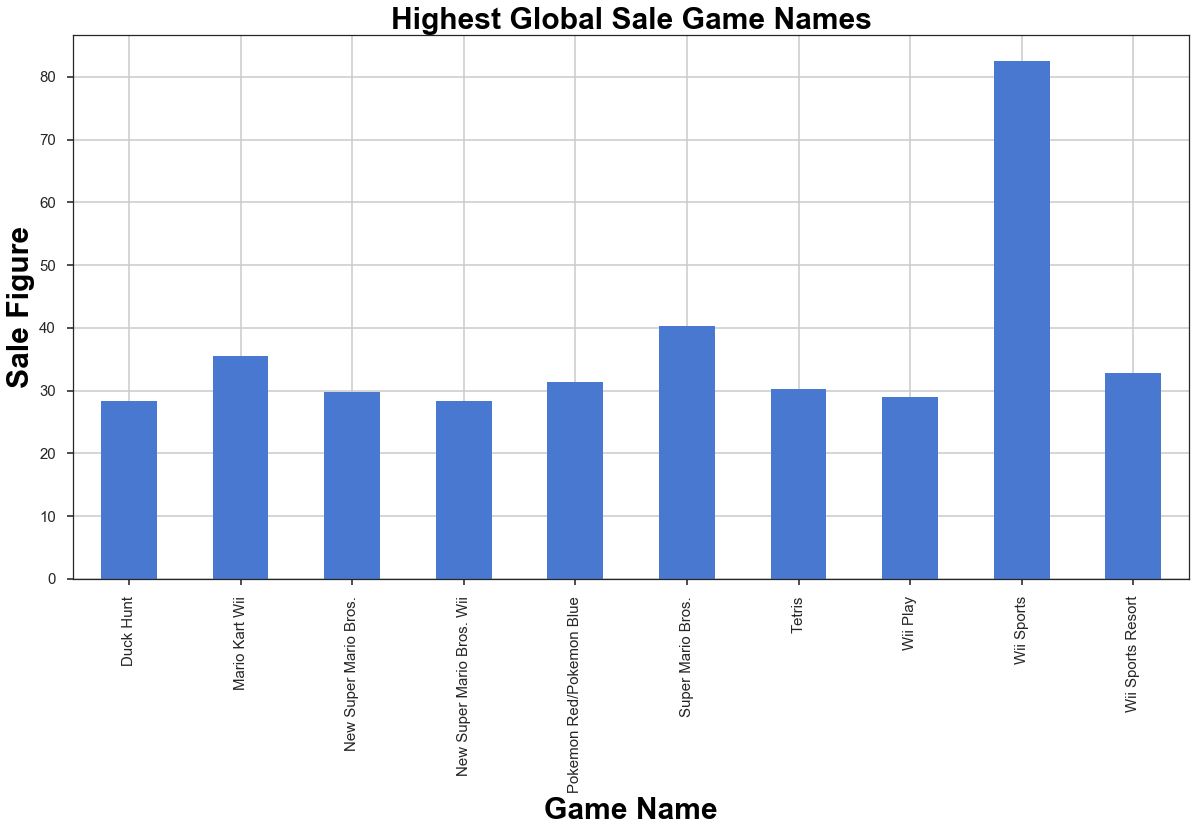

In [13]:
# Plot the best sold games globally on a bar chart
ax = test.plot(kind='bar', figsize=(20,10))
ax.set_xlabel("Game Name", size=30)
ax.set_ylabel("Sale Figure", size=30)
ax.set_title("Highest Global Sale Game Names", size=30)


Lets Analyse the region sales. We will begin with the EU Sales. As seen below the highest game for the EU Sales is WII Sports followed by Mario Kart Wii. Our aim is to see if the number 1 game globally performs best across each region or do they vary. The Eu Sales are smaller than those of global sales so we will only take into consideration games that sold more than 7 million copies worth.

In [14]:
# Filter European sales that have higher than 7 million sales
sales1 =  sales[sales['EU_Sales'] >= 7.00]

In [15]:
# (['Genre', 'Year_of_Release'])['Year_of_Release']
# Group the names of the games with the highest selling values in european region and sum the highest selling games
s = sales1.groupby(['Name'])['EU_Sales'].sum()
s

Name
Brain Age: Train Your Brain in Minutes a Day     9.20
Grand Theft Auto V                               9.09
Mario Kart DS                                    7.47
Mario Kart Wii                                  12.76
New Super Mario Bros.                            9.14
Nintendogs                                      10.95
Pokemon Red/Pokemon Blue                         8.89
Wii Fit                                          8.03
Wii Fit Plus                                     8.49
Wii Play                                         9.18
Wii Sports                                      28.96
Wii Sports Resort                               10.93
Name: EU_Sales, dtype: float64

Text(0,0.5,'Sale Figure')

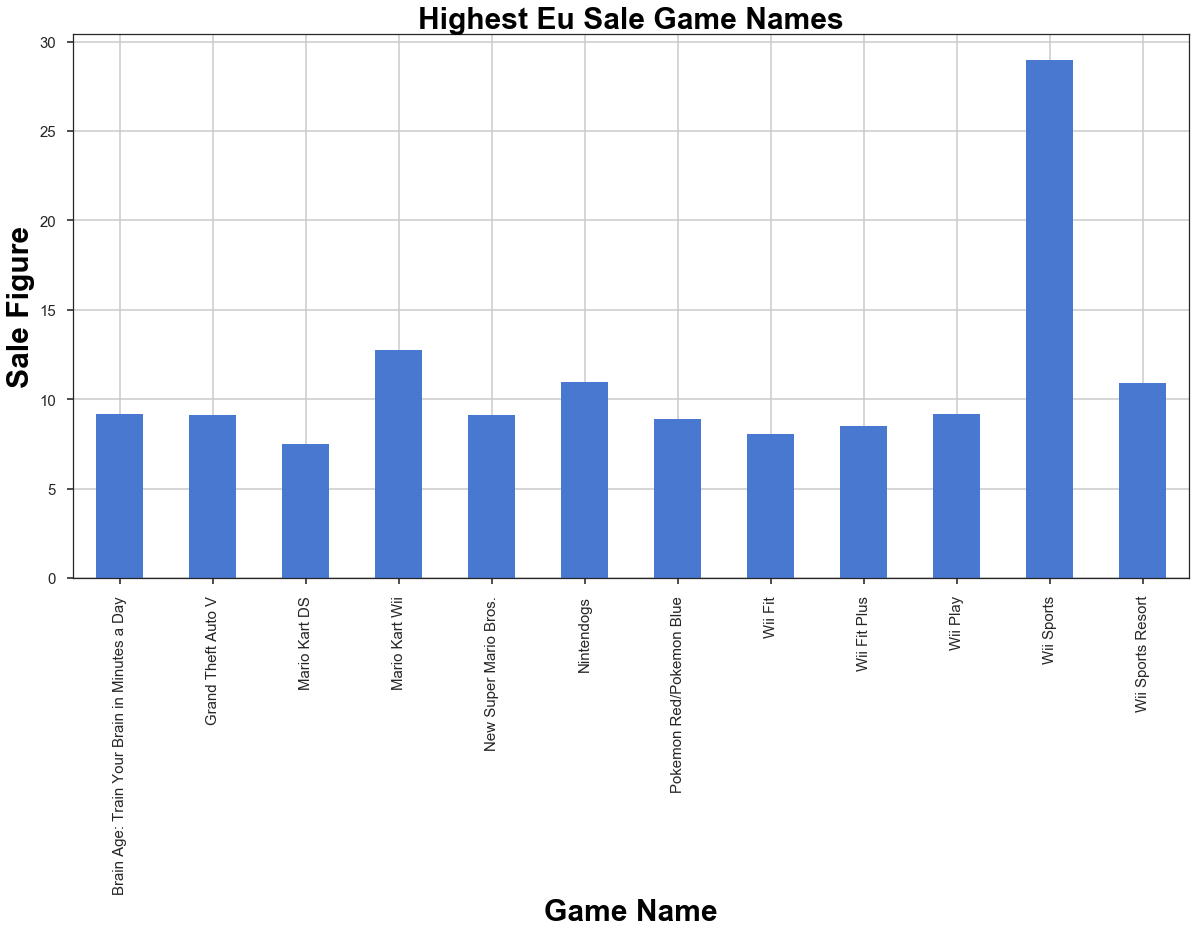

In [16]:
# Plot the highest sold game names on a bar chart to show the top sold games in EU
ax = s.plot(kind='bar', figsize=(20,10))
ax.set_xlabel("Game Name", size=30)
ax.set_title("Highest Eu Sale Game Names", size=30)
ax.set_ylabel("Sale Figure", size=30)


We will now analyse the Japanese Sales. We will analyse the top 4 regions which are EU, Global, North America and Japan. The sales figures for Japan are considerably smaller than those for Global and EU so we will only filter the sales greater than 4.90 million. 

In [17]:
# Only filter the japanese sales that have a higher sales than 4.90 million
sales_japan = sales[sales['JP_Sales'] >= 4.90]
sales_japan

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Nintendo
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NaN
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,Nintendo
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN
43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,Nintendo


In [18]:
# Find the names of the top sold games in the japanese region and sum the values
japan = sales_japan.groupby(['Name'])['JP_Sales'].sum()
japan

Name
Animal Crossing: Wild World                     5.33
Brain Age 2: More Training in Minutes a Day     5.32
New Super Mario Bros.                           6.50
Pokemon Black/Pokemon White                     5.65
Pokemon Diamond/Pokemon Pearl                   6.04
Pokemon Gold/Pokemon Silver                     7.20
Pokemon Red/Pokemon Blue                       10.22
Pokemon Ruby/Pokemon Sapphire                   5.38
Super Mario Bros.                               6.81
Name: JP_Sales, dtype: float64

Text(0.5,1,'Highest Japanese Sale Game Names')

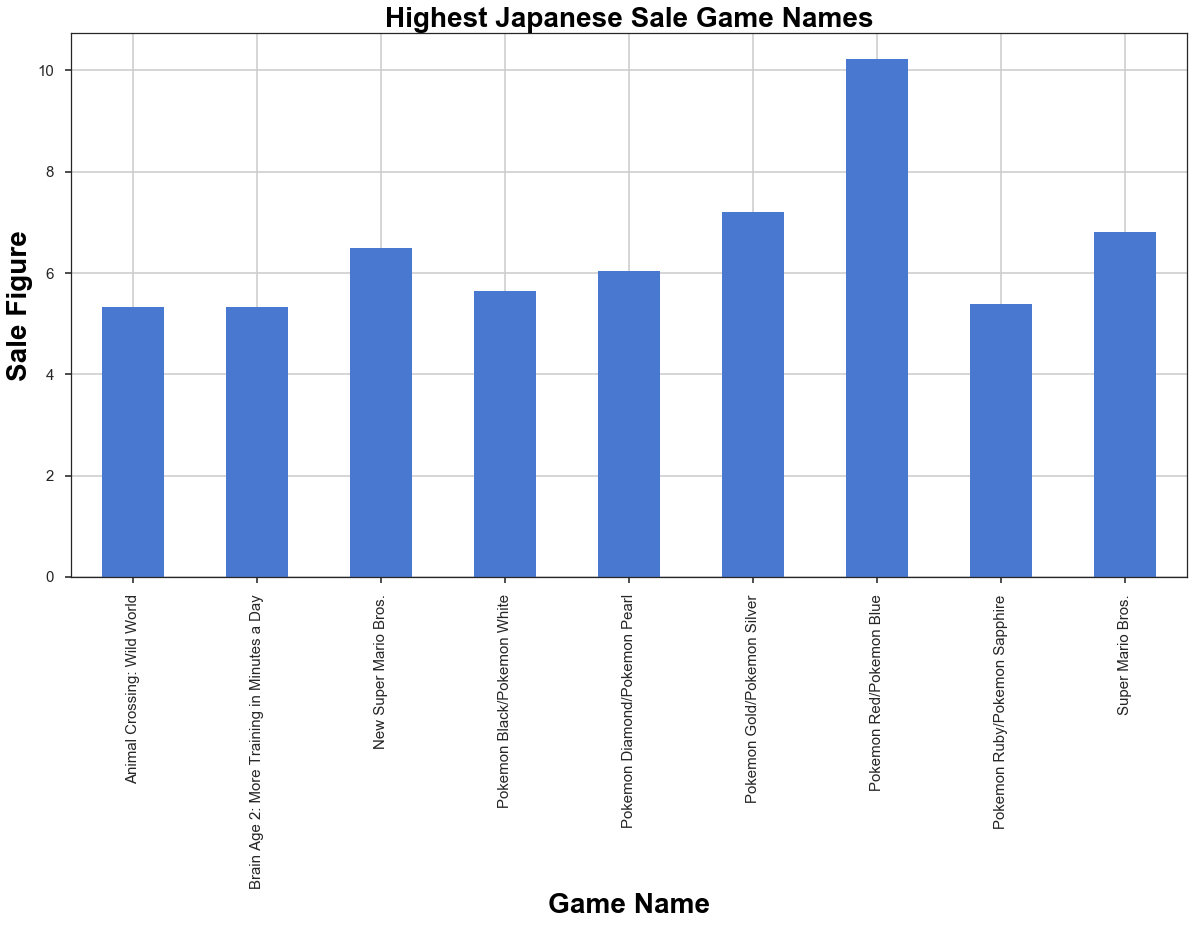

In [19]:
# Plot the highest sold games in Japan for the all time
ax = japan.plot(kind='bar', figsize=(20,10))
ax.set_xlabel("Game Name")
ax.set_ylabel("Sale Figure")
ax.set_title("Highest Japanese Sale Game Names")

As we can see from the Japanese analysis the sales figures are different to what we have found out so far from the EU and Global sales. The highest game for the Japanese market is Pokemon Red / Pokemon Blue 

We will now analyse the Sales for the North America region to see if this has the same number 1 game as the other three regions or not.  

In [20]:
# Only look for games sold in north america that are greater than 11 million
n_a = sales[sales['NA_Sales'] >= 11.0]
n_a 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,Nintendo
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Nintendo
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN


In [21]:
# Group the north american sales by the names and sum the highest sold games
america = n_a.groupby(['Name'])['NA_Sales'].sum()
america

Name
Duck Hunt                    26.93
Kinect Adventures!           15.00
Mario Kart Wii               15.68
New Super Mario Bros.        11.28
New Super Mario Bros. Wii    14.44
Pokemon Red/Pokemon Blue     11.27
Super Mario Bros.            29.08
Super Mario World            12.78
Tetris                       23.20
Wii Play                     13.96
Wii Sports                   41.36
Wii Sports Resort            15.61
Name: NA_Sales, dtype: float64

Text(0.5,1,'Highest North American Sale Game Names')

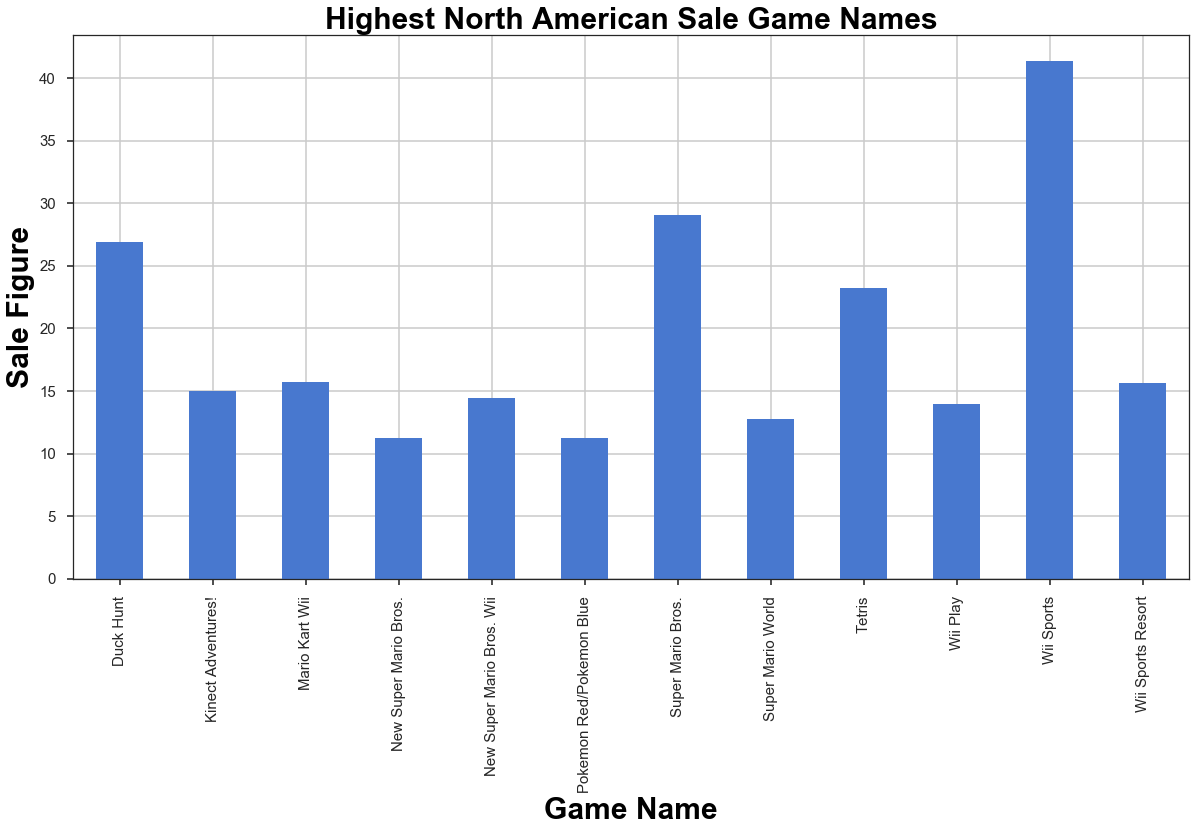

In [22]:
ax = america.plot(kind='bar', figsize=(20,10))
ax.set_xlabel("Game Name", size=30)
ax.set_ylabel("Sale Figure", size= 30)
ax.set_title("Highest North American Sale Game Names", size = 30)

As we can see the highest sold game in this region was WII sports which correlates to the EU Region and the global region. This means that this game performed best overall from 3 out of the 4 regions.

### Number of Genres released each year

We have checked the highest overall genre category. But now we would like to analyse the highest Genre Category for each year. I will divide everything up into separate genres.

In [23]:
# Look for action matches in genre in dataframe
action = sales[sales['Genre'] == 'Action']
# group by the release year an coun the genre
yearly = action.groupby('Year_of_Release', as_index = False)['Genre'].count()
# set years of release as the index
yearly = yearly.set_index('Year_of_Release')
# Action column gets renamed from Genre previously
yearly.rename(columns={'Genre': 'Action'}, inplace=True)
yearly.head()

,Action
Year_of_Release,
1980.0,1
1981.0,25
1982.0,18
1983.0,7
1984.0,1


In [24]:
# Look for adventure, group it by adventure and count number of adventure releases
adventure = sales[sales['Genre'] == 'Adventure']
tmp = adventure.groupby(['Year_of_Release'])['Genre'].count()
yearly['Adventure'] = tmp

In [25]:
# look for fighting group it by fighting and count number of fighting releases
fighting = sales[sales['Genre'] == 'Fighting']
tmp = fighting.groupby(['Year_of_Release'])['Genre'].count()
yearly['Fighting'] = tmp

In [26]:
# look for misc group and count number of misc releases
misc = sales[sales['Genre'] == 'Misc']
tmp = misc.groupby(['Year_of_Release'])['Genre'].count()
yearly['Misc'] = tmp

In [27]:
# look for platform group and count number of platform releases
platform = sales[sales['Genre'] == 'Platform']
tmp = platform.groupby(['Year_of_Release'])['Genre'].count()
yearly['Platform'] = tmp

In [28]:
# look for puzzle group and count number of puzzle releases
puzzle = sales[sales['Genre'] == 'Puzzle']
tmp = puzzle.groupby(['Year_of_Release'])['Genre'].count()
yearly['Puzzle'] = tmp

In [29]:

# look for racing group and count number of releases
racing = sales[sales['Genre'] == 'Racing']
tmp = racing.groupby(['Year_of_Release'])['Genre'].count()
yearly['Racing'] = tmp

In [30]:
# look for role playing and count number of releases
roleplaying = sales[sales['Genre'] == 'Role-Playing']
tmp = roleplaying.groupby(['Year_of_Release'])['Genre'].count()
yearly['Role_Playing'] = tmp

In [31]:
# look for shooter and count number of releases
shooter = sales[sales['Genre'] == 'Shooter']
tmp = shooter.groupby(['Year_of_Release'])['Genre'].count()
yearly['Shooter'] = tmp

In [32]:
# look for simulation and count releases
simulation = sales[sales['Genre'] == 'Simulation']
tmp = simulation.groupby(['Year_of_Release'])['Genre'].count()
yearly['Simulation'] = tmp

In [33]:
# look for sports and count releases
sports = sales[sales['Genre'] == 'Sports']
tmp = sports.groupby(['Year_of_Release'])['Genre'].count()
yearly['Sports'] = tmp

In [34]:
# look for strategy and count releases
strategy = sales[sales['Genre'] == 'Strategy']
tmp = strategy.groupby(['Year_of_Release'])['Genre'].count()
yearly['Strategy'] = tmp
# fill null values with 0 and print 5 lines of the new table
yearly.fillna(value = 0, inplace = True)
yearly.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1980.0,1,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,1,0.0
1981.0,25,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4,0.0
1982.0,18,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2,0.0
1983.0,7,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1,0.0
1984.0,1,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2,0.0


In [35]:
# best year for action
yearly['Action'].argmax()

2009.0

In [36]:
# best year for adventure
yearly['Adventure'].argmax()

2008.0

In [37]:
# best year for fighting
yearly['Fighting'].argmax()

2008.0

In [38]:
# best year for misc
yearly['Misc'].argmax()

2008.0

In [39]:
# best year for platform
yearly['Platform'].argmax()

2003.0

In [40]:
# best year for puzzle
yearly['Puzzle'].argmax()

2009.0

In [41]:
# best year for racing
yearly['Racing'].argmax()

2003.0

In [42]:
# best year for role playing
yearly['Role_Playing'].argmax()

2008.0

In [43]:
# best year for shooter
yearly['Shooter'].argmax()

2005.0

In [44]:
# best year for simulation
yearly['Simulation'].argmax()

2009.0

In [45]:
# best year for sports
yearly['Sports'].argmax()

2008.0

In [46]:
# best year for strategy
yearly['Strategy'].argmax()

2007.0

Above we have analysed each genre and checked in which year the most of that genre was released. As seen above 2008 and 2009 seem to be the more dominant years with them having the highest releases in most of the genres. 

## IGN Data Analyses

Now that we have analysed the data and found our important analyses in terms of the industry of the golden year. We would now like to take the gamers perspective with the analysis and analyse the gamer side in terms of ratings numeically and also the score phrase

In [47]:
combined_data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-11-13,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Good,7.5,N
2008-04-20,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Great,8.5,Y
2009-07-16,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Good,7.7,N
2006-05-06,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Amazing,9.5,Y
2009-11-13,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Great,8.9,Y


## Analysis of the numeric score

First lets analyse how many scores did each console receive. 

In [48]:
# find the amount of scores for each console and count them 
scores = combined_data.groupby(['Platform'])['score'].count()
scores

Platform
3DS       91
DC        24
DS       734
GB         1
GC       386
N64      207
PC       529
PS       539
PS2     1160
PS3      650
PS4      109
PSV       51
SNES       1
Wii      552
WiiU      58
X360     736
XB       606
Name: score, dtype: int64

Lets analyse the amount of each score. (I.E)- see how many time each score was used to rate a game

In [49]:
# count the number of times a numeric value was used to score a game
score_values = combined_data.groupby(['score'])['score'].count()
score_values.head()

score
1.0    7
1.1    1
1.2    1
1.3    1
1.4    1
Name: score, dtype: int64

#### Finding the highest score and number of occurences

We will check how many times the highest score appeared throughout the ratings. We will also check what the highest score value itself was. As seen below the score 8.0 was the highest and it appeared a total of 497 times.

In [50]:
# total times the highest score number was used 
combined_data['score'].value_counts().max()

497

In [51]:
# the most used number when scoring a game
combined_data.score.mode()

0    8.0
dtype: float64

#### Finding the most common score phrase and occurences

In [52]:
# Counting the number of times a score phrase is used 
score_phrase = combined_data.groupby(['score_phrase'])['score_phrase'].count()
score_phrase

score_phrase
Amazing         729
Awful           226
Bad             448
Good           1504
Great          1723
Masterpiece      14
Mediocre        669
Okay            986
Painful         114
Unbearable       21
Name: score_phrase, dtype: int64

We will check the most common score phrase from the reviews and the amount of times this score phrase appeared 

In [53]:
# how many times the most used score phrase appears
combined_data['score_phrase'].value_counts().max()

1723

In [54]:
# the most used score phrase
combined_data['score_phrase'].mode()

0    Great
dtype: object

In [55]:
# count the number of times score phrases are used each year and check the highest year in terms of score phrases
combined_data.groupby(combined_data.index.strftime('%Y'))['score_phrase'].count()

1996     43
1997    120
1998    141
1999    210
2000    259
2001    219
2002    405
2003    429
2004    415
2005    455
2006    417
2007    554
2008    741
2009    581
2010    382
2011    348
2012    232
2013    208
2014    144
2015     84
2016     47
Name: score_phrase, dtype: int64

As seen above there are many different score phrases, however the most popular occurence is great which appears a total of 1723 times. 

### Lets check the best year in terms of reviews

We would like to see what was the highest score per year. In order to anlyse the best year in terms of score reviews for the gamers perspective.

In [56]:
# sum the yearly sales and score for each business end year by using .resample(A)
yearly_data = combined_data.resample("A").sum()
yearly_data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score
Date,,,,,,
1996-12-31,30.44,13.82,7.11,1.92,53.28,290.8
1997-12-31,60.15,26.24,16.17,4.75,107.31,805.3
1998-12-31,67.21,30.52,16.40,4.82,118.91,1002.5
1999-12-31,95.03,44.35,21.72,6.68,168.00,1550.5
2000-12-31,78.30,41.78,23.42,8.09,151.59,1777.8


In [57]:
# Check the highest scored year
yearly_data['score'].idxmax()

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

As we can see from the result above after we found the max value of the index column. The highest year in terms of score reviews was in fact 2008. This means this is the sum of the scores across the whole year and 2008 was the highest scored year. Lets now analyse what was the best year for sale in all our regions also.

In [58]:
# Highest North American sales year
yearly_data['NA_Sales'].idxmax()

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [59]:
# check the higest EU sales year
yearly_data['EU_Sales'].idxmax()

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [60]:
# Check the highest JP sales year
yearly_data['JP_Sales'].idxmax()

Timestamp('2006-12-31 00:00:00', freq='A-DEC')

In [61]:
# Check the highest global sales year
yearly_data['Global_Sales'].idxmax()

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

As we can see in terms of sales the 'golden year' for EU , North America and Global sales was 2008. The only differnce for the golden year in terms of sales was in the Japanese region. The golden year for Japanese sales was 2006. This is interesting to note that this year was the best across 4 out of our 5 columns especially because this was the time of the financial crisis.

#### Getting average rating per year

We would like to see what year has the highest average scores. This is useful to analyse because of the gamers golden year. We need to know is 2008 also the highest average rated year or is the gamers golden year different. 

In [62]:
# Get average rating for each year by using .resample(A) and finding the mean of score
avg_rating = combined_data.resample("A").mean()
avg_rating['score']

Date
1996-12-31    6.762791
1997-12-31    6.710833
1998-12-31    7.109929
1999-12-31    7.383333
2000-12-31    6.864093
2001-12-31    7.328311
2002-12-31    7.124691
2003-12-31    7.512587
2004-12-31    7.357349
2005-12-31    7.251209
2006-12-31    6.996163
2007-12-31    6.661913
2008-12-31    6.351822
2009-12-31    6.822203
2010-12-31    6.869110
2011-12-31    7.048851
2012-12-31    7.665948
2013-12-31    7.562019
2014-12-31    7.503472
2015-12-31    7.815476
2016-12-31    7.468085
Freq: A-DEC, Name: score, dtype: float64

As seen above the gamers golden year is 2015 infact. Where as the industries golden year is 2008. This is interesting to make note of as 2008 is actually the lowest scored average year. 2015 is the highest average scored year due to some great games being released during that period increasing the overall score. 

## Saving to a pickle  

Saving the dataframe to a pickle file

In [63]:
yearly.to_pickle("../../data/analysis/100_Golden_year.pkl")

In [64]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'os',
 'sys',
 'pandas',
 'numpy',
 'hashlib',
 'matplotlib.pylab',
 'seaborn',
 'types']